## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  66.062184   426.723321  0.049430  10.267801  0.289361
1  49.486222  1520.909186  0.700796   3.583107  1.656229
2  91.844692  1454.897208  0.202870   4.484063  1.290809
3  17.634787  1510.891827  0.508932   2.064810  1.495208
4  22.044288  1690.643818  0.718688  10.319330  1.543935


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 0.93291 | train_mse: 6.70689 | train_mae: 1.86929 |  0:00:00s
epoch 1  | loss: 0.56787 | train_mse: 3.54455 | train_mae: 1.3525  |  0:00:00s
epoch 2  | loss: 0.43897 | train_mse: 2.77183 | train_mae: 1.129   |  0:00:00s


epoch 3  | loss: 0.30622 | train_mse: 2.10443 | train_mae: 0.88777 |  0:00:00s
epoch 4  | loss: 0.3926  | train_mse: 1.1544  | train_mae: 0.76328 |  0:00:00s


epoch 5  | loss: 0.45667 | train_mse: 0.98376 | train_mae: 0.66715 |  0:00:00s
epoch 6  | loss: 0.3438  | train_mse: 0.97223 | train_mae: 0.69481 |  0:00:00s
epoch 7  | loss: 0.42153 | train_mse: 0.93453 | train_mae: 0.68948 |  0:00:01s


epoch 8  | loss: 0.34189 | train_mse: 0.828   | train_mae: 0.62666 |  0:00:01s
epoch 9  | loss: 0.39276 | train_mse: 0.66582 | train_mae: 0.5794  |  0:00:01s
epoch 10 | loss: 0.25456 | train_mse: 0.38559 | train_mae: 0.47355 |  0:00:01s


epoch 11 | loss: 0.25354 | train_mse: 0.60508 | train_mae: 0.5589  |  0:00:01s
epoch 12 | loss: 0.22001 | train_mse: 0.55061 | train_mae: 0.54003 |  0:00:01s
epoch 13 | loss: 0.24004 | train_mse: 0.44669 | train_mae: 0.49453 |  0:00:01s


epoch 14 | loss: 0.36474 | train_mse: 0.26354 | train_mae: 0.40006 |  0:00:01s
epoch 15 | loss: 0.24519 | train_mse: 0.29948 | train_mae: 0.44944 |  0:00:01s
epoch 16 | loss: 0.34221 | train_mse: 0.31919 | train_mae: 0.44977 |  0:00:01s


epoch 17 | loss: 0.28872 | train_mse: 0.36122 | train_mae: 0.45374 |  0:00:01s
epoch 18 | loss: 0.19661 | train_mse: 0.31649 | train_mae: 0.41905 |  0:00:02s
epoch 19 | loss: 0.22975 | train_mse: 0.35206 | train_mae: 0.43658 |  0:00:02s


epoch 20 | loss: 0.16812 | train_mse: 0.56139 | train_mae: 0.50967 |  0:00:02s
epoch 21 | loss: 0.19481 | train_mse: 0.37333 | train_mae: 0.44164 |  0:00:02s
epoch 22 | loss: 0.1929  | train_mse: 0.35956 | train_mae: 0.44003 |  0:00:02s


epoch 23 | loss: 0.13057 | train_mse: 0.35704 | train_mae: 0.43736 |  0:00:02s
epoch 24 | loss: 0.12407 | train_mse: 0.4084  | train_mae: 0.45293 |  0:00:02s


epoch 25 | loss: 0.18549 | train_mse: 0.31267 | train_mae: 0.40296 |  0:00:02s
epoch 26 | loss: 0.36249 | train_mse: 0.5658  | train_mae: 0.50437 |  0:00:02s
epoch 27 | loss: 0.20998 | train_mse: 0.46502 | train_mae: 0.48627 |  0:00:02s


epoch 28 | loss: 0.18873 | train_mse: 0.18793 | train_mae: 0.34697 |  0:00:02s
epoch 29 | loss: 0.2752  | train_mse: 0.27271 | train_mae: 0.37368 |  0:00:03s
epoch 30 | loss: 0.09335 | train_mse: 0.44117 | train_mae: 0.44831 |  0:00:03s


epoch 31 | loss: 0.17032 | train_mse: 0.63199 | train_mae: 0.50314 |  0:00:03s
epoch 32 | loss: 0.19376 | train_mse: 0.57719 | train_mae: 0.48565 |  0:00:03s
epoch 33 | loss: 0.1155  | train_mse: 0.41815 | train_mae: 0.42901 |  0:00:03s


epoch 34 | loss: 0.10307 | train_mse: 0.2506  | train_mae: 0.33501 |  0:00:03s
epoch 35 | loss: 0.16195 | train_mse: 0.13441 | train_mae: 0.26359 |  0:00:03s


epoch 36 | loss: 0.18375 | train_mse: 0.08257 | train_mae: 0.23087 |  0:00:03s
epoch 37 | loss: 0.25426 | train_mse: 0.10115 | train_mae: 0.24845 |  0:00:03s


epoch 38 | loss: 0.11714 | train_mse: 0.2977  | train_mae: 0.37451 |  0:00:03s
epoch 39 | loss: 0.23646 | train_mse: 0.21249 | train_mae: 0.31144 |  0:00:03s
epoch 40 | loss: 0.09386 | train_mse: 0.24256 | train_mae: 0.33035 |  0:00:04s


epoch 41 | loss: 0.15507 | train_mse: 0.24933 | train_mae: 0.35468 |  0:00:04s
epoch 42 | loss: 0.09556 | train_mse: 0.22139 | train_mae: 0.33374 |  0:00:04s
epoch 43 | loss: 0.1385  | train_mse: 0.21123 | train_mae: 0.3168  |  0:00:04s


epoch 44 | loss: 0.17205 | train_mse: 0.27563 | train_mae: 0.34613 |  0:00:04s
epoch 45 | loss: 0.22862 | train_mse: 0.27266 | train_mae: 0.3405  |  0:00:04s
epoch 46 | loss: 0.08988 | train_mse: 0.28959 | train_mae: 0.35839 |  0:00:04s


epoch 47 | loss: 0.19021 | train_mse: 0.25026 | train_mae: 0.34438 |  0:00:04s


epoch 48 | loss: 0.10329 | train_mse: 0.27457 | train_mae: 0.36335 |  0:00:04s
epoch 49 | loss: 0.13037 | train_mse: 0.25194 | train_mae: 0.34242 |  0:00:04s
epoch 50 | loss: 0.10791 | train_mse: 0.14902 | train_mae: 0.26774 |  0:00:05s


epoch 51 | loss: 0.12908 | train_mse: 0.1198  | train_mae: 0.25347 |  0:00:05s
epoch 52 | loss: 0.20771 | train_mse: 0.09594 | train_mae: 0.21765 |  0:00:05s
epoch 53 | loss: 0.13865 | train_mse: 0.11556 | train_mae: 0.22995 |  0:00:05s


epoch 54 | loss: 0.09935 | train_mse: 0.13974 | train_mae: 0.25237 |  0:00:05s
epoch 55 | loss: 0.11553 | train_mse: 0.15788 | train_mae: 0.25759 |  0:00:05s
epoch 56 | loss: 0.08841 | train_mse: 0.12757 | train_mae: 0.23215 |  0:00:05s


epoch 57 | loss: 0.12196 | train_mse: 0.10459 | train_mae: 0.22055 |  0:00:05s
epoch 58 | loss: 0.107   | train_mse: 0.08962 | train_mae: 0.2114  |  0:00:05s


epoch 59 | loss: 0.18116 | train_mse: 0.11363 | train_mae: 0.23348 |  0:00:05s
epoch 60 | loss: 0.0663  | train_mse: 0.09744 | train_mae: 0.20986 |  0:00:06s
epoch 61 | loss: 0.25658 | train_mse: 0.10993 | train_mae: 0.23436 |  0:00:06s


epoch 62 | loss: 0.11588 | train_mse: 0.13821 | train_mae: 0.24487 |  0:00:06s
epoch 63 | loss: 0.09159 | train_mse: 0.26568 | train_mae: 0.33462 |  0:00:06s
epoch 64 | loss: 0.12838 | train_mse: 0.40142 | train_mae: 0.40484 |  0:00:06s


epoch 65 | loss: 0.11084 | train_mse: 0.3301  | train_mae: 0.36174 |  0:00:06s
epoch 66 | loss: 0.11612 | train_mse: 0.23175 | train_mae: 0.32087 |  0:00:06s


epoch 67 | loss: 0.064   | train_mse: 0.19238 | train_mae: 0.27487 |  0:00:06s
epoch 68 | loss: 0.43477 | train_mse: 0.27741 | train_mae: 0.35624 |  0:00:06s
epoch 69 | loss: 0.06085 | train_mse: 0.22052 | train_mae: 0.31825 |  0:00:06s


epoch 70 | loss: 0.07959 | train_mse: 0.1624  | train_mae: 0.26189 |  0:00:07s
epoch 71 | loss: 0.27327 | train_mse: 0.20492 | train_mae: 0.28624 |  0:00:07s
epoch 72 | loss: 0.08018 | train_mse: 0.22178 | train_mae: 0.30183 |  0:00:07s


epoch 73 | loss: 0.18869 | train_mse: 0.22957 | train_mae: 0.32747 |  0:00:07s
epoch 74 | loss: 0.09285 | train_mse: 0.18103 | train_mae: 0.29792 |  0:00:07s
epoch 75 | loss: 0.28822 | train_mse: 0.09646 | train_mae: 0.23168 |  0:00:07s


epoch 76 | loss: 0.14534 | train_mse: 0.07723 | train_mae: 0.20344 |  0:00:07s
epoch 77 | loss: 0.06736 | train_mse: 0.08645 | train_mae: 0.20767 |  0:00:07s
epoch 78 | loss: 0.08914 | train_mse: 0.1502  | train_mae: 0.25734 |  0:00:07s


epoch 79 | loss: 0.2898  | train_mse: 0.1568  | train_mae: 0.25829 |  0:00:07s
epoch 80 | loss: 0.10905 | train_mse: 0.13079 | train_mae: 0.24257 |  0:00:07s
epoch 81 | loss: 0.08428 | train_mse: 0.09337 | train_mae: 0.21431 |  0:00:07s


epoch 82 | loss: 0.1854  | train_mse: 0.09261 | train_mae: 0.21236 |  0:00:08s
epoch 83 | loss: 0.16989 | train_mse: 0.06184 | train_mae: 0.18874 |  0:00:08s
epoch 84 | loss: 0.09974 | train_mse: 0.06573 | train_mae: 0.1916  |  0:00:08s


epoch 85 | loss: 0.10458 | train_mse: 0.07677 | train_mae: 0.19855 |  0:00:08s
epoch 86 | loss: 0.06995 | train_mse: 0.12992 | train_mae: 0.23657 |  0:00:08s
epoch 87 | loss: 0.06525 | train_mse: 0.12818 | train_mae: 0.22511 |  0:00:08s


epoch 88 | loss: 0.08153 | train_mse: 0.11439 | train_mae: 0.21669 |  0:00:08s
epoch 89 | loss: 0.06864 | train_mse: 0.10237 | train_mae: 0.20428 |  0:00:08s
epoch 90 | loss: 0.30785 | train_mse: 0.09796 | train_mae: 0.21539 |  0:00:08s


epoch 91 | loss: 0.07427 | train_mse: 0.11497 | train_mae: 0.22529 |  0:00:08s
epoch 92 | loss: 0.2441  | train_mse: 0.15769 | train_mae: 0.25464 |  0:00:08s
epoch 93 | loss: 0.10245 | train_mse: 0.13956 | train_mae: 0.24478 |  0:00:08s


epoch 94 | loss: 0.13733 | train_mse: 0.11024 | train_mae: 0.2361  |  0:00:09s
epoch 95 | loss: 0.07857 | train_mse: 0.08725 | train_mae: 0.2138  |  0:00:09s
epoch 96 | loss: 0.08226 | train_mse: 0.06632 | train_mae: 0.20105 |  0:00:09s


epoch 97 | loss: 0.12136 | train_mse: 0.06027 | train_mae: 0.19236 |  0:00:09s
epoch 98 | loss: 0.07689 | train_mse: 0.05507 | train_mae: 0.17994 |  0:00:09s
epoch 99 | loss: 0.09454 | train_mse: 0.0654  | train_mae: 0.19357 |  0:00:09s


epoch 100| loss: 0.13858 | train_mse: 0.05933 | train_mae: 0.18727 |  0:00:09s
epoch 101| loss: 0.24917 | train_mse: 0.05977 | train_mae: 0.18586 |  0:00:09s


epoch 102| loss: 0.06134 | train_mse: 0.06139 | train_mae: 0.18855 |  0:00:09s
epoch 103| loss: 0.05498 | train_mse: 0.05786 | train_mae: 0.18623 |  0:00:09s
epoch 104| loss: 0.10503 | train_mse: 0.05413 | train_mae: 0.18385 |  0:00:10s


epoch 105| loss: 0.07516 | train_mse: 0.05668 | train_mae: 0.18113 |  0:00:10s
epoch 106| loss: 0.09393 | train_mse: 0.06275 | train_mae: 0.1863  |  0:00:10s
epoch 107| loss: 0.15314 | train_mse: 0.06639 | train_mae: 0.18852 |  0:00:10s


epoch 108| loss: 0.09197 | train_mse: 0.06984 | train_mae: 0.18435 |  0:00:10s
epoch 109| loss: 0.1357  | train_mse: 0.07413 | train_mae: 0.19069 |  0:00:10s
epoch 110| loss: 0.0694  | train_mse: 0.05581 | train_mae: 0.1736  |  0:00:10s


epoch 111| loss: 0.24428 | train_mse: 0.05362 | train_mae: 0.17721 |  0:00:10s
epoch 112| loss: 0.13124 | train_mse: 0.07596 | train_mae: 0.19966 |  0:00:10s
epoch 113| loss: 0.06593 | train_mse: 0.0591  | train_mae: 0.18275 |  0:00:10s


epoch 114| loss: 0.25184 | train_mse: 0.04662 | train_mae: 0.17267 |  0:00:10s
epoch 115| loss: 0.08829 | train_mse: 0.07363 | train_mae: 0.20039 |  0:00:11s
epoch 116| loss: 0.19396 | train_mse: 0.08582 | train_mae: 0.21003 |  0:00:11s


epoch 117| loss: 0.13644 | train_mse: 0.08154 | train_mae: 0.20108 |  0:00:11s
epoch 118| loss: 0.08247 | train_mse: 0.05524 | train_mae: 0.18261 |  0:00:11s
epoch 119| loss: 0.10891 | train_mse: 0.04918 | train_mae: 0.17836 |  0:00:11s


epoch 120| loss: 0.11791 | train_mse: 0.04319 | train_mae: 0.16907 |  0:00:11s
epoch 121| loss: 0.09057 | train_mse: 0.04071 | train_mae: 0.16791 |  0:00:11s


epoch 122| loss: 0.0454  | train_mse: 0.04493 | train_mae: 0.17188 |  0:00:11s
epoch 123| loss: 0.05254 | train_mse: 0.0604  | train_mae: 0.18657 |  0:00:11s
epoch 124| loss: 0.06054 | train_mse: 0.0903  | train_mae: 0.21154 |  0:00:12s


epoch 125| loss: 0.20454 | train_mse: 0.07629 | train_mae: 0.20445 |  0:00:12s
epoch 126| loss: 0.05778 | train_mse: 0.05182 | train_mae: 0.18027 |  0:00:12s
epoch 127| loss: 0.06486 | train_mse: 0.04967 | train_mae: 0.17271 |  0:00:12s


epoch 128| loss: 0.08215 | train_mse: 0.05164 | train_mae: 0.17557 |  0:00:12s
epoch 129| loss: 0.14896 | train_mse: 0.05443 | train_mae: 0.1859  |  0:00:12s
epoch 130| loss: 0.05594 | train_mse: 0.05696 | train_mae: 0.18921 |  0:00:12s


epoch 131| loss: 0.07962 | train_mse: 0.04809 | train_mae: 0.17383 |  0:00:12s
epoch 132| loss: 0.08226 | train_mse: 0.05375 | train_mae: 0.17958 |  0:00:12s
epoch 133| loss: 0.15645 | train_mse: 0.03443 | train_mae: 0.15578 |  0:00:12s


epoch 134| loss: 0.09993 | train_mse: 0.04884 | train_mae: 0.1771  |  0:00:12s
epoch 135| loss: 0.19245 | train_mse: 0.10558 | train_mae: 0.22296 |  0:00:13s
epoch 136| loss: 0.074   | train_mse: 0.10464 | train_mae: 0.21638 |  0:00:13s


epoch 137| loss: 0.06923 | train_mse: 0.06977 | train_mae: 0.19476 |  0:00:13s
epoch 138| loss: 0.15811 | train_mse: 0.0719  | train_mae: 0.20195 |  0:00:13s
epoch 139| loss: 0.07578 | train_mse: 0.05993 | train_mae: 0.18492 |  0:00:13s


epoch 140| loss: 0.09386 | train_mse: 0.05756 | train_mae: 0.17963 |  0:00:13s
epoch 141| loss: 0.11686 | train_mse: 0.06752 | train_mae: 0.19938 |  0:00:13s


epoch 142| loss: 0.06041 | train_mse: 0.05852 | train_mae: 0.18834 |  0:00:13s
epoch 143| loss: 0.26277 | train_mse: 0.04716 | train_mae: 0.17315 |  0:00:13s
epoch 144| loss: 0.07784 | train_mse: 0.04705 | train_mae: 0.17044 |  0:00:13s


epoch 145| loss: 0.16671 | train_mse: 0.04871 | train_mae: 0.17241 |  0:00:14s
epoch 146| loss: 0.09668 | train_mse: 0.04332 | train_mae: 0.16773 |  0:00:14s
epoch 147| loss: 0.05672 | train_mse: 0.05277 | train_mae: 0.1826  |  0:00:14s


epoch 148| loss: 0.08283 | train_mse: 0.05831 | train_mae: 0.18725 |  0:00:14s
epoch 149| loss: 0.08193 | train_mse: 0.07038 | train_mae: 0.19699 |  0:00:14s
epoch 150| loss: 0.0541  | train_mse: 0.13691 | train_mae: 0.23745 |  0:00:14s


epoch 151| loss: 0.16028 | train_mse: 0.1673  | train_mae: 0.23878 |  0:00:14s


epoch 152| loss: 0.07644 | train_mse: 0.07251 | train_mae: 0.1892  |  0:00:14s
epoch 153| loss: 0.10895 | train_mse: 0.05409 | train_mae: 0.1789  |  0:00:14s


epoch 154| loss: 0.08333 | train_mse: 0.04694 | train_mae: 0.16629 |  0:00:15s
epoch 155| loss: 0.07552 | train_mse: 0.05369 | train_mae: 0.17766 |  0:00:15s
epoch 156| loss: 0.12426 | train_mse: 0.06461 | train_mae: 0.18912 |  0:00:15s


epoch 157| loss: 0.33336 | train_mse: 0.05569 | train_mae: 0.1754  |  0:00:15s
epoch 158| loss: 0.1199  | train_mse: 0.08046 | train_mae: 0.19806 |  0:00:15s
epoch 159| loss: 0.12913 | train_mse: 0.06251 | train_mae: 0.18187 |  0:00:15s


epoch 160| loss: 0.09222 | train_mse: 0.05659 | train_mae: 0.18332 |  0:00:15s
epoch 161| loss: 0.12347 | train_mse: 0.07201 | train_mae: 0.19023 |  0:00:15s


epoch 162| loss: 0.26484 | train_mse: 0.07217 | train_mae: 0.19839 |  0:00:15s
epoch 163| loss: 0.14142 | train_mse: 0.08339 | train_mae: 0.21305 |  0:00:15s
epoch 164| loss: 0.11605 | train_mse: 0.06614 | train_mae: 0.18755 |  0:00:15s


epoch 165| loss: 0.08856 | train_mse: 0.05211 | train_mae: 0.17633 |  0:00:16s
epoch 166| loss: 0.11906 | train_mse: 0.04662 | train_mae: 0.16926 |  0:00:16s
epoch 167| loss: 0.06684 | train_mse: 0.04649 | train_mae: 0.16137 |  0:00:16s


epoch 168| loss: 0.08302 | train_mse: 0.073   | train_mae: 0.20348 |  0:00:16s
epoch 169| loss: 0.07008 | train_mse: 0.07142 | train_mae: 0.19801 |  0:00:16s
epoch 170| loss: 0.04728 | train_mse: 0.0675  | train_mae: 0.19942 |  0:00:16s


epoch 171| loss: 0.10385 | train_mse: 0.06455 | train_mae: 0.20277 |  0:00:16s
epoch 172| loss: 0.10099 | train_mse: 0.0508  | train_mae: 0.17413 |  0:00:16s


epoch 173| loss: 0.08674 | train_mse: 0.04166 | train_mae: 0.16087 |  0:00:16s
epoch 174| loss: 0.06426 | train_mse: 0.0399  | train_mae: 0.15408 |  0:00:16s
epoch 175| loss: 0.08822 | train_mse: 0.05377 | train_mae: 0.16717 |  0:00:16s


epoch 176| loss: 0.05667 | train_mse: 0.09522 | train_mae: 0.20886 |  0:00:17s
epoch 177| loss: 0.09427 | train_mse: 0.09988 | train_mae: 0.20831 |  0:00:17s
epoch 178| loss: 0.04873 | train_mse: 0.08498 | train_mae: 0.20064 |  0:00:17s


epoch 179| loss: 0.13798 | train_mse: 0.06419 | train_mae: 0.19555 |  0:00:17s
epoch 180| loss: 0.08565 | train_mse: 0.05689 | train_mae: 0.17251 |  0:00:17s
epoch 181| loss: 0.07981 | train_mse: 0.05348 | train_mae: 0.16882 |  0:00:17s


epoch 182| loss: 0.05805 | train_mse: 0.07101 | train_mae: 0.1966  |  0:00:17s
epoch 183| loss: 0.0865  | train_mse: 0.06849 | train_mae: 0.18873 |  0:00:17s
epoch 184| loss: 0.061   | train_mse: 0.05437 | train_mae: 0.16089 |  0:00:17s


epoch 185| loss: 0.04839 | train_mse: 0.04707 | train_mae: 0.16033 |  0:00:17s
epoch 186| loss: 0.0648  | train_mse: 0.03042 | train_mae: 0.13595 |  0:00:17s
epoch 187| loss: 0.06028 | train_mse: 0.03002 | train_mae: 0.13982 |  0:00:17s


epoch 188| loss: 0.04527 | train_mse: 0.03667 | train_mae: 0.15692 |  0:00:18s
epoch 189| loss: 0.07491 | train_mse: 0.03077 | train_mae: 0.1428  |  0:00:18s


epoch 190| loss: 0.17086 | train_mse: 0.03934 | train_mae: 0.15956 |  0:00:18s
epoch 191| loss: 0.07082 | train_mse: 0.03918 | train_mae: 0.1582  |  0:00:18s
epoch 192| loss: 0.0586  | train_mse: 0.03067 | train_mae: 0.13901 |  0:00:18s


epoch 193| loss: 0.11797 | train_mse: 0.03616 | train_mae: 0.15098 |  0:00:18s
epoch 194| loss: 0.17169 | train_mse: 0.03903 | train_mae: 0.15282 |  0:00:18s


epoch 195| loss: 0.08141 | train_mse: 0.06038 | train_mae: 0.18072 |  0:00:18s
epoch 196| loss: 0.05385 | train_mse: 0.10379 | train_mae: 0.21885 |  0:00:18s
epoch 197| loss: 0.11897 | train_mse: 0.11214 | train_mae: 0.2178  |  0:00:18s


epoch 198| loss: 0.05082 | train_mse: 0.06835 | train_mae: 0.19324 |  0:00:19s
epoch 199| loss: 0.13743 | train_mse: 0.03974 | train_mae: 0.15325 |  0:00:19s


epoch 200| loss: 0.08025 | train_mse: 0.02974 | train_mae: 0.13909 |  0:00:19s
epoch 201| loss: 0.12269 | train_mse: 0.03428 | train_mae: 0.14961 |  0:00:19s


epoch 202| loss: 0.05562 | train_mse: 0.04937 | train_mae: 0.17094 |  0:00:19s


epoch 203| loss: 0.06273 | train_mse: 0.05776 | train_mae: 0.18389 |  0:00:19s


epoch 204| loss: 0.07058 | train_mse: 0.05009 | train_mae: 0.1756  |  0:00:20s
epoch 205| loss: 0.08454 | train_mse: 0.04528 | train_mae: 0.16635 |  0:00:20s


epoch 206| loss: 0.04606 | train_mse: 0.0563  | train_mae: 0.17089 |  0:00:20s
epoch 207| loss: 0.04403 | train_mse: 0.07048 | train_mae: 0.18706 |  0:00:20s


epoch 208| loss: 0.08704 | train_mse: 0.06236 | train_mae: 0.18526 |  0:00:20s
epoch 209| loss: 0.05536 | train_mse: 0.06887 | train_mae: 0.19468 |  0:00:20s


epoch 210| loss: 0.06149 | train_mse: 0.0679  | train_mae: 0.19145 |  0:00:20s
epoch 211| loss: 0.12351 | train_mse: 0.06008 | train_mae: 0.17816 |  0:00:21s


epoch 212| loss: 0.06388 | train_mse: 0.07447 | train_mae: 0.18717 |  0:00:21s
epoch 213| loss: 0.06339 | train_mse: 0.10844 | train_mae: 0.21417 |  0:00:21s


epoch 214| loss: 0.05731 | train_mse: 0.15017 | train_mae: 0.23585 |  0:00:21s
epoch 215| loss: 0.06105 | train_mse: 0.29142 | train_mae: 0.2818  |  0:00:21s


epoch 216| loss: 0.13169 | train_mse: 0.31249 | train_mae: 0.30113 |  0:00:21s
epoch 217| loss: 0.06742 | train_mse: 0.24158 | train_mae: 0.28924 |  0:00:21s
epoch 218| loss: 0.15543 | train_mse: 0.27744 | train_mae: 0.2891  |  0:00:21s


epoch 219| loss: 0.102   | train_mse: 0.37866 | train_mae: 0.30208 |  0:00:21s
epoch 220| loss: 0.06058 | train_mse: 0.38445 | train_mae: 0.30147 |  0:00:22s
epoch 221| loss: 0.09225 | train_mse: 0.33767 | train_mae: 0.29565 |  0:00:22s


epoch 222| loss: 0.08804 | train_mse: 0.28821 | train_mae: 0.29509 |  0:00:22s
epoch 223| loss: 0.04925 | train_mse: 0.36416 | train_mae: 0.32241 |  0:00:22s
epoch 224| loss: 0.05751 | train_mse: 0.3535  | train_mae: 0.31368 |  0:00:22s


epoch 225| loss: 0.04419 | train_mse: 0.27853 | train_mae: 0.26861 |  0:00:22s
epoch 226| loss: 0.13199 | train_mse: 0.22528 | train_mae: 0.23675 |  0:00:22s


epoch 227| loss: 0.06928 | train_mse: 0.06939 | train_mae: 0.18126 |  0:00:22s
epoch 228| loss: 0.04679 | train_mse: 0.04725 | train_mae: 0.16165 |  0:00:22s


epoch 229| loss: 0.08693 | train_mse: 0.03397 | train_mae: 0.14244 |  0:00:22s
epoch 230| loss: 0.04122 | train_mse: 0.03039 | train_mae: 0.14059 |  0:00:23s


epoch 231| loss: 0.05473 | train_mse: 0.02876 | train_mae: 0.13859 |  0:00:23s
epoch 232| loss: 0.06149 | train_mse: 0.02852 | train_mae: 0.13812 |  0:00:23s


epoch 233| loss: 0.06543 | train_mse: 0.0292  | train_mae: 0.13469 |  0:00:23s
epoch 234| loss: 0.20095 | train_mse: 0.03384 | train_mae: 0.14177 |  0:00:23s


epoch 235| loss: 0.08582 | train_mse: 0.04551 | train_mae: 0.15244 |  0:00:23s
epoch 236| loss: 0.05586 | train_mse: 0.05584 | train_mae: 0.15745 |  0:00:23s
epoch 237| loss: 0.06641 | train_mse: 0.07116 | train_mae: 0.18394 |  0:00:23s


epoch 238| loss: 0.06076 | train_mse: 0.07776 | train_mae: 0.18482 |  0:00:23s
epoch 239| loss: 0.0759  | train_mse: 0.08333 | train_mae: 0.17828 |  0:00:24s


epoch 240| loss: 0.04706 | train_mse: 0.09214 | train_mae: 0.18641 |  0:00:24s
epoch 241| loss: 0.07471 | train_mse: 0.08128 | train_mae: 0.18145 |  0:00:24s
epoch 242| loss: 0.11423 | train_mse: 0.07074 | train_mae: 0.17523 |  0:00:24s


epoch 243| loss: 0.12774 | train_mse: 0.05844 | train_mae: 0.16481 |  0:00:24s
epoch 244| loss: 0.13619 | train_mse: 0.06971 | train_mae: 0.17992 |  0:00:24s
epoch 245| loss: 0.08495 | train_mse: 0.03495 | train_mae: 0.14419 |  0:00:24s


epoch 246| loss: 0.07496 | train_mse: 0.04832 | train_mae: 0.16231 |  0:00:24s
epoch 247| loss: 0.05894 | train_mse: 0.20174 | train_mae: 0.24446 |  0:00:24s
epoch 248| loss: 0.04812 | train_mse: 0.35744 | train_mae: 0.30621 |  0:00:24s


epoch 249| loss: 0.03253 | train_mse: 0.46814 | train_mae: 0.33344 |  0:00:24s
epoch 250| loss: 0.04915 | train_mse: 0.50597 | train_mae: 0.34264 |  0:00:25s
epoch 251| loss: 0.13875 | train_mse: 0.31459 | train_mae: 0.29137 |  0:00:25s


epoch 252| loss: 0.0956  | train_mse: 0.06849 | train_mae: 0.19045 |  0:00:25s
epoch 253| loss: 0.06389 | train_mse: 0.04912 | train_mae: 0.17127 |  0:00:25s
epoch 254| loss: 0.1589  | train_mse: 0.05626 | train_mae: 0.17841 |  0:00:25s


epoch 255| loss: 0.10493 | train_mse: 0.10229 | train_mae: 0.20628 |  0:00:25s
epoch 256| loss: 0.13715 | train_mse: 0.15903 | train_mae: 0.2325  |  0:00:25s


epoch 257| loss: 0.0953  | train_mse: 0.14025 | train_mae: 0.22081 |  0:00:25s
epoch 258| loss: 0.09089 | train_mse: 0.12584 | train_mae: 0.2188  |  0:00:25s
epoch 259| loss: 0.10992 | train_mse: 0.12875 | train_mae: 0.22658 |  0:00:25s


epoch 260| loss: 0.18993 | train_mse: 0.14069 | train_mae: 0.23482 |  0:00:25s
epoch 261| loss: 0.07928 | train_mse: 0.12605 | train_mae: 0.22245 |  0:00:26s
epoch 262| loss: 0.05503 | train_mse: 0.13217 | train_mae: 0.23008 |  0:00:26s


epoch 263| loss: 0.04004 | train_mse: 0.1386  | train_mae: 0.22976 |  0:00:26s
epoch 264| loss: 0.04303 | train_mse: 0.09888 | train_mae: 0.20369 |  0:00:26s
epoch 265| loss: 0.03336 | train_mse: 0.07071 | train_mae: 0.18317 |  0:00:26s


epoch 266| loss: 0.05076 | train_mse: 0.0488  | train_mae: 0.16355 |  0:00:26s
epoch 267| loss: 0.03718 | train_mse: 0.03507 | train_mae: 0.1464  |  0:00:26s
epoch 268| loss: 0.1435  | train_mse: 0.03022 | train_mae: 0.13469 |  0:00:26s


epoch 269| loss: 0.03348 | train_mse: 0.03076 | train_mae: 0.13529 |  0:00:26s
epoch 270| loss: 0.07531 | train_mse: 0.0368  | train_mae: 0.14142 |  0:00:26s
epoch 271| loss: 0.05015 | train_mse: 0.05141 | train_mae: 0.15893 |  0:00:26s


epoch 272| loss: 0.04098 | train_mse: 0.05321 | train_mae: 0.16067 |  0:00:27s
epoch 273| loss: 0.11811 | train_mse: 0.08003 | train_mae: 0.184   |  0:00:27s
epoch 274| loss: 0.0445  | train_mse: 0.09863 | train_mae: 0.20034 |  0:00:27s


epoch 275| loss: 0.04154 | train_mse: 0.08877 | train_mae: 0.19479 |  0:00:27s
epoch 276| loss: 0.04132 | train_mse: 0.10025 | train_mae: 0.19091 |  0:00:27s
epoch 277| loss: 0.05599 | train_mse: 0.12642 | train_mae: 0.18737 |  0:00:27s


epoch 278| loss: 0.03377 | train_mse: 0.13591 | train_mae: 0.19365 |  0:00:27s
epoch 279| loss: 0.12977 | train_mse: 0.09631 | train_mae: 0.19038 |  0:00:27s


epoch 280| loss: 0.042   | train_mse: 0.08314 | train_mae: 0.19188 |  0:00:27s
epoch 281| loss: 0.05028 | train_mse: 0.07127 | train_mae: 0.17946 |  0:00:27s
epoch 282| loss: 0.05537 | train_mse: 0.16158 | train_mae: 0.21337 |  0:00:27s


epoch 283| loss: 0.04497 | train_mse: 0.20776 | train_mae: 0.23469 |  0:00:28s
epoch 284| loss: 0.03642 | train_mse: 0.21505 | train_mae: 0.23847 |  0:00:28s
epoch 285| loss: 0.03513 | train_mse: 0.22922 | train_mae: 0.24801 |  0:00:28s


epoch 286| loss: 0.05006 | train_mse: 0.28714 | train_mae: 0.25849 |  0:00:28s
epoch 287| loss: 0.12618 | train_mse: 0.33101 | train_mae: 0.26075 |  0:00:28s


epoch 288| loss: 0.06833 | train_mse: 0.24943 | train_mae: 0.24745 |  0:00:28s
epoch 289| loss: 0.07814 | train_mse: 0.15775 | train_mae: 0.22456 |  0:00:28s


epoch 290| loss: 0.10186 | train_mse: 0.07692 | train_mae: 0.1841  |  0:00:28s
epoch 291| loss: 0.05749 | train_mse: 0.05046 | train_mae: 0.16473 |  0:00:29s


epoch 292| loss: 0.22276 | train_mse: 0.04171 | train_mae: 0.15481 |  0:00:29s


epoch 293| loss: 0.13445 | train_mse: 0.04516 | train_mae: 0.16076 |  0:00:29s
epoch 294| loss: 0.05831 | train_mse: 0.04047 | train_mae: 0.14891 |  0:00:29s


epoch 295| loss: 0.05242 | train_mse: 0.03943 | train_mae: 0.14038 |  0:00:29s
epoch 296| loss: 0.08616 | train_mse: 0.04767 | train_mae: 0.15887 |  0:00:29s
epoch 297| loss: 0.05751 | train_mse: 0.18359 | train_mae: 0.23236 |  0:00:29s


epoch 298| loss: 0.05132 | train_mse: 0.25875 | train_mae: 0.25881 |  0:00:30s
epoch 299| loss: 0.04881 | train_mse: 0.26351 | train_mae: 0.26395 |  0:00:30s
epoch 300| loss: 0.10387 | train_mse: 0.22424 | train_mae: 0.24403 |  0:00:30s


epoch 301| loss: 0.05799 | train_mse: 0.20956 | train_mae: 0.23695 |  0:00:30s
epoch 302| loss: 0.04236 | train_mse: 0.19046 | train_mae: 0.2284  |  0:00:30s


epoch 303| loss: 0.05301 | train_mse: 0.16273 | train_mae: 0.21897 |  0:00:30s
epoch 304| loss: 0.05543 | train_mse: 0.1495  | train_mae: 0.21747 |  0:00:30s
epoch 305| loss: 0.05436 | train_mse: 0.1083  | train_mae: 0.19985 |  0:00:30s


epoch 306| loss: 0.05519 | train_mse: 0.13469 | train_mae: 0.20206 |  0:00:30s
epoch 307| loss: 0.05441 | train_mse: 0.16328 | train_mae: 0.21754 |  0:00:30s
epoch 308| loss: 0.09241 | train_mse: 0.1065  | train_mae: 0.20637 |  0:00:30s


epoch 309| loss: 0.05438 | train_mse: 0.14918 | train_mae: 0.21483 |  0:00:31s
epoch 310| loss: 0.04314 | train_mse: 0.17192 | train_mae: 0.21835 |  0:00:31s
epoch 311| loss: 0.0451  | train_mse: 0.10056 | train_mae: 0.19379 |  0:00:31s


epoch 312| loss: 0.04597 | train_mse: 0.07068 | train_mae: 0.17636 |  0:00:31s
epoch 313| loss: 0.04384 | train_mse: 0.05702 | train_mae: 0.16547 |  0:00:31s
epoch 314| loss: 0.03947 | train_mse: 0.05036 | train_mae: 0.15832 |  0:00:31s


epoch 315| loss: 0.03645 | train_mse: 0.04723 | train_mae: 0.15474 |  0:00:31s
epoch 316| loss: 0.04207 | train_mse: 0.04579 | train_mae: 0.15521 |  0:00:31s
epoch 317| loss: 0.04492 | train_mse: 0.05904 | train_mae: 0.1704  |  0:00:31s


epoch 318| loss: 0.08989 | train_mse: 0.11626 | train_mae: 0.20281 |  0:00:31s

Early stopping occurred at epoch 318 with best_epoch = 268 and best_train_mae = 0.13469
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

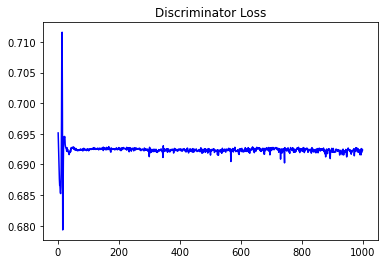

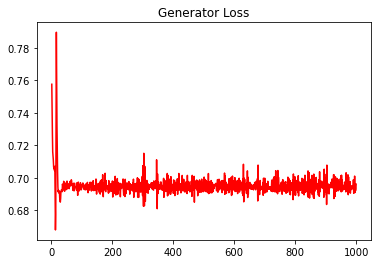

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1606439118453704


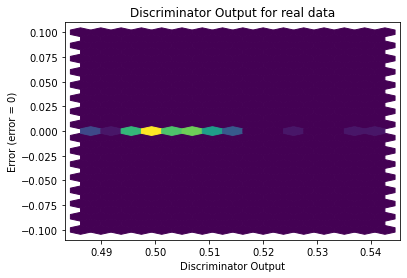

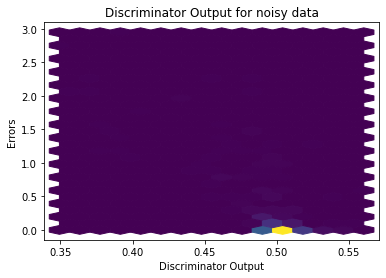

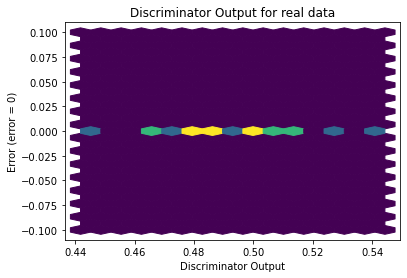

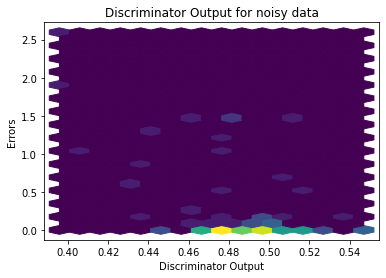

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


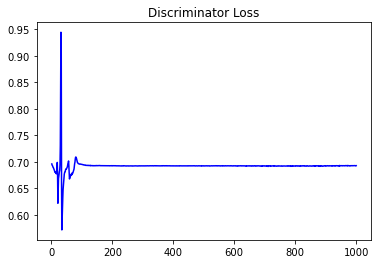

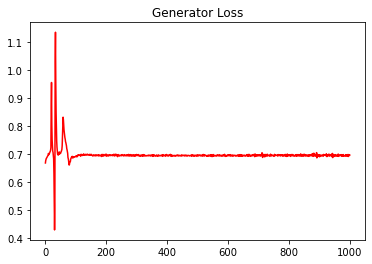

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1529617782271059


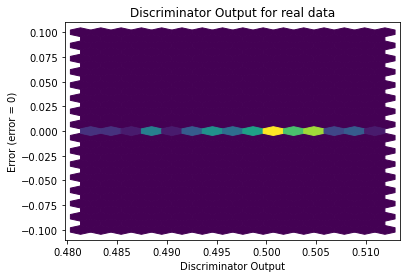

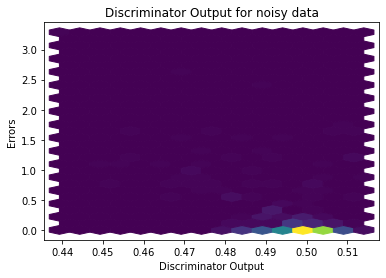

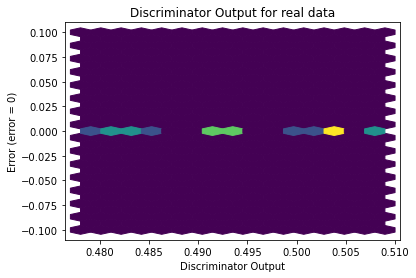

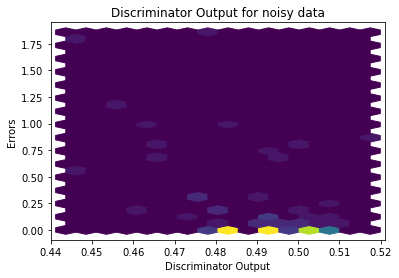

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5424]], requires_grad=True)
